In [1]:
import SMEFT19

In [98]:
import numpy as np
import pandas as pd
from SMEFT19.plots import likelihood_plot
from collections import OrderedDict
from parscanning import GridScan
from SMEFT19.SMEFTglob import likelihood_fits
from SMEFT19.scenarios import scIV, scV, scVI, scXI
import flavio
import warnings

In [2]:
def read_meshgrid(fnames, stepx=50, stepy=50):
    zdata_LHC = pd.read_csv(fnames[0], sep='\t')
    zdata_ILC = pd.read_csv(fnames[1], sep='\t')
    xcoords = np.linspace(zdata_LHC['x'].min(), zdata_LHC['x'].max(), stepx)
    ycoords = np.linspace(zdata_LHC['y'].min(), zdata_LHC['y'].max(), stepy)
    d = OrderedDict()
    fitcodes = {r'$R_{K^{(*)}}$':'likelihood_lfu_fcnc.yaml', r'$R_{D^{(*)}}$':'likelihood_rd_rds.yaml', 'EW (LHC)':'likelihood_ewpt.yaml', 'eeWW':'likelihood_eeww.yaml', 'Global (LHC)':'global'}
    for k, v in zip(fitcodes.keys(), fitcodes.values()):
        z = np.array(zdata_LHC[v]).reshape(stepx, stepy)
        d[k] = z    
    d['EW (ILC)'] = np.array(zdata_ILC[fitcodes['EW (LHC)']]).reshape(stepx, stepy)
    d.move_to_end('Global (LHC)')
    d['Global (ILC)'] = d['Global (LHC)'] - d['EW (LHC)'] + d['EW (ILC)']
    d['EW (LHC)'] = d['EW (LHC)'] + d['eeWW']
    d['EW (ILC)'] = d['EW (ILC)'] + d['eeWW']
    d.pop('eeWW')
    return (xcoords, ycoords, d)

In [3]:
ILC_green = (0.462745,0.803922,0.149020)
ILC_brown = (0.745098,0.392157,0.000000)

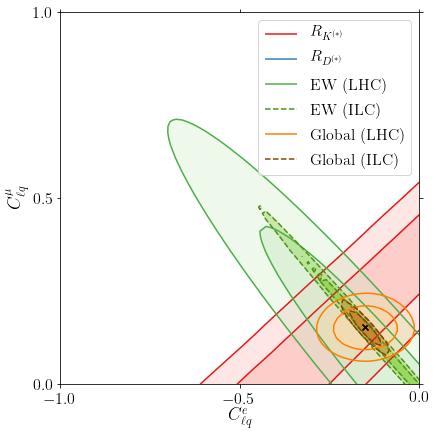

In [44]:
likelihood_plot(read_meshgrid(['../../likelihood/likelihood_IV.dat', '../../likelihood/likelihood_IV_ILC.dat']), -1.0, 0.0, 0.0, 1.0, [r'$C_{\ell q}^e$', r'$C_{\ell q}^\mu$'], locleg='upper right', colors=[0,1,2,ILC_green,4,ILC_brown], bf=[-0.1511,0.152], widths=[1.5,]*6, styles=['solid', 'solid', 'solid', 'dashed', 'solid', 'dashed'], fout='../../plots/scIV_ILC')

linewidths is ignored by contourf


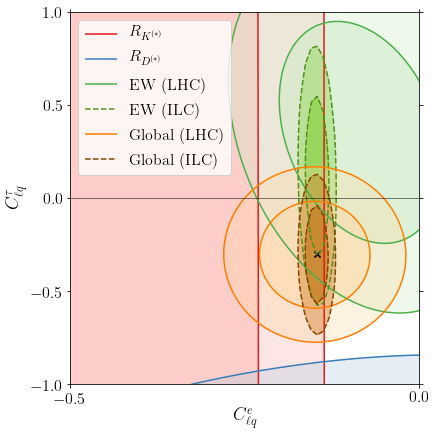

In [4]:
likelihood_plot(read_meshgrid(['../../likelihood/likelihood_V.dat', '../../likelihood/likelihood_V_ILC.dat']),
                -0.5, 0.0, -1.0, 1.0, [r'$C_{\ell q}^e$', r'$C_{\ell q}^\tau$'], locleg='upper left',
                colors=[0,1,2,ILC_green,4,ILC_brown], bf=[-0.1467,-0.2998], widths=[1.5,]*6,
                styles=['solid', 'solid', 'solid', 'dashed', 'solid', 'dashed'], fout='../../plots/scV_ILC')

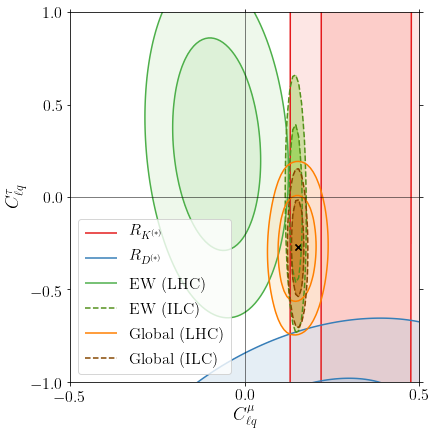

In [6]:
likelihood_plot(read_meshgrid(['../../likelihood/likelihood_VI.dat', '../../likelihood/likelihood_VI_ILC.dat']),
                -0.5, 0.5, -1.0, 1.0, [r'$C_{\ell q}^\mu$', r'$C_{\ell q}^\tau$'], locleg='lower left',
                colors=[0,1,2,ILC_green,4,ILC_brown], bf=[0.152,-0.271], widths=[1.5,]*6,
                styles=['solid', 'solid', 'solid', 'dashed', 'solid', 'dashed'], fout='../../plots/scVI_ILC')

In [9]:
SMEFT19.SMEFTglob.gl.likelihoods

{'likelihood_ewpt.yaml': <flavio.statistics.likelihood.Likelihood at 0x7efe729fa5e0>,
 'likelihood_eeww.yaml': <flavio.statistics.likelihood.Likelihood at 0x7efe729a0370>,
 'likelihood_lept.yaml': <flavio.statistics.likelihood.Likelihood at 0x7efe72a28d90>,
 'likelihood_rd_rds.yaml': <flavio.statistics.likelihood.Likelihood at 0x7efe72a28a90>,
 'likelihood_lfu_fccc.yaml': <flavio.statistics.likelihood.Likelihood at 0x7efe7ede71c0>,
 'likelihood_lfu_fcnc.yaml': <flavio.statistics.likelihood.Likelihood at 0x7efe729fa7c0>,
 'likelihood_bcpv.yaml': <flavio.statistics.likelihood.Likelihood at 0x7efe72a285e0>,
 'likelihood_bqnunu.yaml': <flavio.statistics.likelihood.Likelihood at 0x7efe72a28fa0>,
 'likelihood_lfv.yaml': <flavio.statistics.likelihood.Likelihood at 0x7efe72a28ac0>,
 'likelihood_zlfv.yaml': <flavio.statistics.likelihood.Likelihood at 0x7efe72a28a60>,
 'likelihood_higgs.yaml': <flavio.statistics.likelihood.Likelihood at 0x7efe72a28d60>}

In [23]:
len(SMEFT19.SMEFTglob.smelli.flavio.Measurement.instances)

263

In [24]:
n = 'scVII'

In [25]:
n[2:]

'VII'

In [16]:
r = 0.226745 * 256

In [ ]:
g = 0.393921

In [17]:
import colorsys

In [20]:
hsl = colorsys.rgb_to_hls(r=0.226745, g=0.393921, b=0.073020)

In [22]:
hsl2 = (hsl[0], hsl[1]/0.7, hsl[2])

In [24]:
rgb2 = colorsys.hls_to_rgb(*hsl2)

In [25]:
rgb2

(0.32392142857142847, 0.5627442857142857, 0.1043142857142858)

In [8]:
import pandas as pd

In [13]:
df_LHC = pd.read_csv('../../likelihood/likelihood_IV.dat', sep='\t')

In [14]:
df_ILC = pd.read_csv('../../likelihood/likelihood_IV_ILC.dat', sep='\t')

In [17]:
df_LHC['global']

0      -2546.454763
1      -2403.120463
2      -2265.450131
3      -2133.456244
4      -2007.115995
           ...     
2495   -1813.840130
2496   -1908.558394
2497   -2008.978772
2498   -2115.132436
2499   -2226.821316
Name: global, Length: 2500, dtype: float64

In [18]:
df_ILC['global']

0      -2549.358783
1      -2405.804599
2      -2267.928128
3      -2135.741551
4      -2009.221729
           ...     
2495   -1815.392480
2496   -1910.127564
2497   -2010.569743
2498   -2116.749587
2499   -2228.469662
Name: global, Length: 2500, dtype: float64

In [19]:
import smelli

In [20]:
smelli.__path__

['/home/jorge/.local/lib/python3.8/site-packages/smelli']

In [22]:
gl = smelli.GlobalLikelihood(include_likelihoods=('likelihood_ewpt.yaml',))

In [23]:
from SMEFT19.scenarios import scVII
from SMEFT19.ellipse import load

In [25]:
dVII = load('../../ellipses/scVII.yaml')

In [26]:
glp = gl.parameter_point(scVII(dVII['bf']))

In [27]:
glp.log_likelihood_dict()

{'likelihood_ewpt.yaml': -1.18375346249449, 'global': -1.18375346249449}

In [1]:
import smelli

In [4]:
smelli.flavio.measurements.read_file('../../InputsILC/Input_scVII.yaml')

['ILC250']

In [7]:
gl = smelli.GlobalLikelihood(include_likelihoods=('likelihood_ewpt.yaml',), custom_measurements={'likelihood_ewpt.yaml':('ILC250',)})

In [8]:
from SMEFT19.scenarios import scVII
from SMEFT19.ellipse import load

In [10]:
dVII = load('../../ellipses/scVII.yaml')

In [11]:
glp = gl.parameter_point(scVII(dVII['bf']))
glp.log_likelihood_dict()

{'likelihood_ewpt.yaml': 0.27066520667663596, 'global': 0.27066520667663596}

In [12]:
dir(gl)

['_Nexp',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_all_likelihoods',
 '_check_sm_cov_loaded',
 '_ckm_scheme',
 '_ckm_scheme_name',
 '_custom_likelihoods_dict',
 '_default_bases',
 '_fast_likelihoods_yaml',
 '_fast_likelihoods_yaml_fixckm',
 '_get_inspire_dict',
 '_get_yaml_path',
 '_likelihoods_yaml',
 '_load_likelihoods',
 '_log_likelihood',
 '_log_likelihood_sm',
 '_obstable_sm',
 '_par_dict_sm',
 '_sm_cov_loaded',
 'basis',
 'chi2_min',
 'custom_likelihoods',
 'eft',
 'fast_likelihoods',
 'fix_ckm',
 'get_ckm_sm',
 'get_wilson',
 'likelihoods',
 'load_exp_covariances',
 'load_sm_covariances',
 'log_likelihood_sm',
 'make_measurement',
 'number_observations_dict',
 'obstable_sm',
 'par_dict_default',
 'par_dict_sm',
 'parameter_point',
 'plot_data_2d',
 'save_exp_covariances',
 'save_sm_covariances']

In [13]:
gl.likelihoods

{'likelihood_ewpt.yaml': <flavio.statistics.likelihood.Likelihood at 0x7f5bc6e58520>}

In [1]:
import SMEFT19

In [2]:
SMEFT19.SMEFTglob.gl.likelihoods

{'likelihood_ewpt.yaml': <flavio.statistics.likelihood.Likelihood at 0x7f02ff787430>,
 'likelihood_eeww.yaml': <flavio.statistics.likelihood.Likelihood at 0x7f02ff7872b0>,
 'likelihood_lept.yaml': <flavio.statistics.likelihood.Likelihood at 0x7f02ff81fdf0>,
 'likelihood_rd_rds.yaml': <flavio.statistics.likelihood.Likelihood at 0x7f02ff81f460>,
 'likelihood_lfu_fccc.yaml': <flavio.statistics.likelihood.Likelihood at 0x7f02ff7871c0>,
 'likelihood_lfu_fcnc.yaml': <flavio.statistics.likelihood.Likelihood at 0x7f02fe045eb0>,
 'likelihood_bcpv.yaml': <flavio.statistics.likelihood.Likelihood at 0x7f02fe045fd0>,
 'likelihood_bqnunu.yaml': <flavio.statistics.likelihood.Likelihood at 0x7f02ff81fb20>,
 'likelihood_lfv.yaml': <flavio.statistics.likelihood.Likelihood at 0x7f02ff81fd30>,
 'likelihood_zlfv.yaml': <flavio.statistics.likelihood.Likelihood at 0x7f02ff81f670>,
 'likelihood_higgs.yaml': <flavio.statistics.likelihood.Likelihood at 0x7f02ff81f640>}

In [3]:
SMEFT19.SMEFTglob.restart_smelli(include_likelihoods=['likelihood_ewpt.yaml',])

In [4]:
SMEFT19.SMEFTglob.gl.likelihoods

{'likelihood_ewpt.yaml': <flavio.statistics.likelihood.Likelihood at 0x7f033829da60>}

In [3]:
beta_obs = ['Ft(10C)', 'Ft(14O)', 'Ft(22Mg)', 'Ft(26mAl)', 'Ft(34Cl)', 'Ft(34Ar)', 'Ft(38mK)', 'Ft(38Ca)',
            'Ft(42Sc)', 'Ft(46V)', 'Ft(50Mn)', 'Ft(54Co)', 'Ft(62Ga)', 'Ft(74Rb)']
SMEFT19.SMEFTglob.restart_smelli(include_likelihoods=['fast_likelihood_quarks.yaml'],
                                 custom_likelihoods={'beta':beta_obs})

In [10]:
t0 = time.time()
SMEFT19.likelihood_fits([-0.15, 0.15], SMEFT19.scenarios.scIV)
tf = time.time()
print(tf-t0)

13.22279691696167


In [5]:
import time

In [6]:
dir(time)

['CLOCK_BOOTTIME',
 'CLOCK_MONOTONIC',
 'CLOCK_MONOTONIC_RAW',
 'CLOCK_PROCESS_CPUTIME_ID',
 'CLOCK_REALTIME',
 'CLOCK_THREAD_CPUTIME_ID',
 '_STRUCT_TM_ITEMS',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'altzone',
 'asctime',
 'clock_getres',
 'clock_gettime',
 'clock_gettime_ns',
 'clock_settime',
 'clock_settime_ns',
 'ctime',
 'daylight',
 'get_clock_info',
 'gmtime',
 'localtime',
 'mktime',
 'monotonic',
 'monotonic_ns',
 'perf_counter',
 'perf_counter_ns',
 'process_time',
 'process_time_ns',
 'pthread_getcpuclockid',
 'sleep',
 'strftime',
 'strptime',
 'struct_time',
 'thread_time',
 'thread_time_ns',
 'time',
 'time_ns',
 'timezone',
 'tzname',
 'tzset']

In [7]:
time.time()

1638095086.1469584

In [8]:
time.time()

1638095093.756874

In [9]:
1638095093.756874-1638095086.1469584

7.609915733337402

In [11]:
13/20

0.65

In [12]:
def read_meshgrid2(fname, stepx=50, stepy=50):
    zdata = pd.read_csv(fname[0], sep='\t')
    zdata_beta = pd.read_csv(fname[1], sep='\t')
    xcoords = np.linspace(zdata['x'].min(), zdata['x'].max(), stepx)
    ycoords = np.linspace(zdata['y'].min(), zdata['y'].max(), stepy)
    fitcodes = {r'$R_{K^{(*)}}$':'likelihood_lfu_fcnc.yaml', r'$R_{D^{(*)}}$':'likelihood_rd_rds.yaml',
                'EW':'likelihood_ewpt.yaml', 'eeWW':'likelihood_eeww.yaml', 'Global':'global'}
    d = OrderedDict()
    for k, v in zip(fitcodes.keys(), fitcodes.values()):
        z = np.array(zdata[v]).reshape(stepx, stepy)
        d.update({k:z})
    d['EW'] = d['EW'] + d['eeWW']
    d[r'Nuclear $\beta$'] = np.array(zdata_beta['custom_beta']).reshape(stepx, stepy)
    d.move_to_end('Global')
    d.pop('eeWW')
    return (xcoords, ycoords, d)

linewidths is ignored by contourf


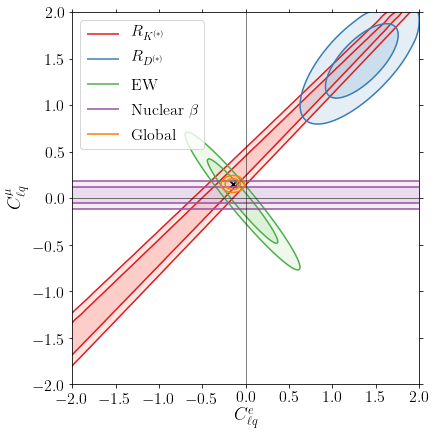

In [14]:
likelihood_plot(read_meshgrid2(['../../likelihood/likelihood_IV.dat', '../../likelihood/likelihood_IV_beta.dat']),
                -2.0, 2.0, -2.0, 2.0, [r'$C_{\ell q}^e$', r'$C_{\ell q}^\mu$'], locleg='upper left',
                colors=[0,1,2,3,4], bf=[-0.1511,0.152], widths=[1.5,]*5, fout='../../plots/scIVbeta')

No contour levels were found within the data range.


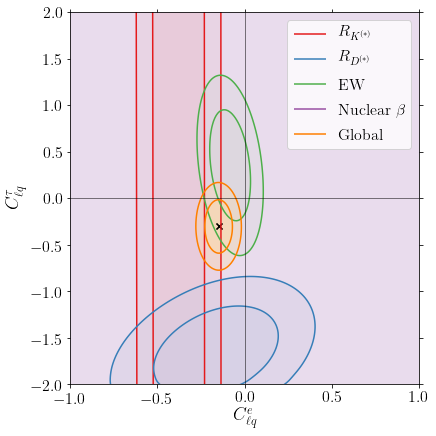

In [17]:
likelihood_plot(read_meshgrid2(['../../likelihood/likelihood_V.dat', '../../likelihood/likelihood_V_beta.dat']),
                -1.0, 1.0, -2.0, 2.0,
                [r'$C_{\ell q}^e$', r'$C_{\ell q}^\tau$'], locleg='upper right', colors=[0,1,2,3,4],
                bf=[-0.1467,-0.2998], widths=[1.5,]*5, fout='../../plots/scV_beta')

In [74]:
dfIV = pd.read_csv('../../likelihood/likelihood_IV_beta.dat', sep='\t')

In [75]:
dfIV.head()

,x,y,fast_likelihood_quarks.yaml,custom_beta,global
0,-2.08,-2.080000,-1085.661268,-607.901123,-1085.661268
1,-2.08,-1.995102,-1001.388771,-560.632094,-1001.388771
2,-2.08,-1.910204,-920.932880,-515.229345,-920.932880
3,-2.08,-1.825306,-844.299853,-471.698775,-844.299853
4,-2.08,-1.740408,-771.438021,-430.046299,-771.438021


In [72]:
var_mu = dfIV.loc[1250:1299]

In [27]:
var_e = dfIV.loc[dfIV['y']==0.0424489795918368]

In [28]:
import matplotlib.pyplot as plt

[<matplotlib.lines.Line2D at 0x7f6911e3f2e0>]

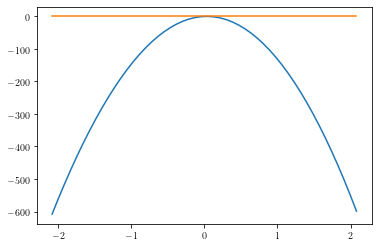

In [30]:
plt.plot(var_mu.y, var_mu.custom_beta)
plt.plot(var_e.x, var_e.custom_beta)

In [32]:
list(var_mu.custom_beta)[0]/list(var_mu.y)[0]**2

-140.49957014924857

In [33]:
list(var_mu.custom_beta)[-1]/list(var_mu.y)[-1]**2

-138.4169155537927

In [81]:
c_mu = (list(var_mu.custom_beta)[24]+list(var_mu.custom_beta)[25])/2
a_mu=((list(var_mu.custom_beta)[0]-c_mu)/list(var_mu.y)[0]**2+(list(var_mu.custom_beta)[-1]-c_mu)/list(var_mu.y)[-1]**2 )/2
a_mu

-139.40018746654277

[<matplotlib.lines.Line2D at 0x7f68f9d08fa0>]

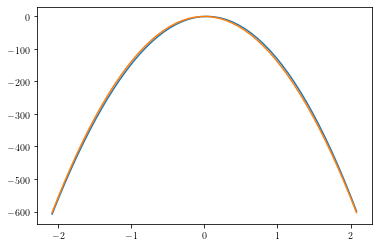

In [82]:
plt.plot(var_mu.y, var_mu.custom_beta)
plt.plot(var_mu.y, a_mu*var_mu.y**2)

In [84]:
c_e = (list(var_e.custom_beta)[24]+list(var_e.custom_beta)[25])/2
a_e=((list(var_e.custom_beta)[0]-c_e)/list(var_e.x)[0]**2+(list(var_e.custom_beta)[-1]-c_e)/list(var_e.x)[-1]**2 )/2

[<matplotlib.lines.Line2D at 0x7f68fafc7820>]

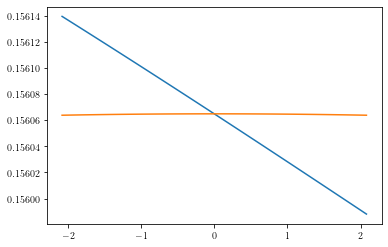

In [89]:
plt.plot(var_e.x, var_e.custom_beta)
plt.plot(var_e.x, a_e*var_e.x**2+c_e)

In [47]:
var_e.iloc[25]

x                              0.042449
y                              0.042449
fast_likelihood_quarks.yaml    2.495179
custom_beta                    0.156063
global                         2.495179
Name: 1275, dtype: float64

In [50]:
var_diag = dfIV.loc[dfIV.x==dfIV.y]

In [51]:
var_diag.head()

,x,y,fast_likelihood_quarks.yaml,custom_beta,global
0,-2.080000,-2.080000,-1085.661268,-607.901123,-1085.661268
51,-1.995102,-1.995102,-1001.724197,-560.630458,-1001.724197
102,-1.910204,-1.910204,-921.361430,-515.226277,-921.361430
153,-1.825306,-1.825306,-844.592657,-471.694471,-844.592657
204,-1.740408,-1.740408,-771.379741,-430.040944,-771.379741


[<matplotlib.lines.Line2D at 0x7f68fa0778b0>]

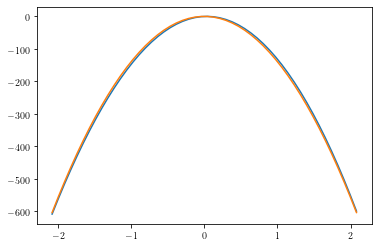

In [52]:
plt.plot(var_diag.x, var_diag.custom_beta)
plt.plot(var_diag.x, a_mu*var_diag.x**2+a_e*var_diag.y**2+c_e)

In [53]:
var_adiag = dfIV.loc[dfIV.x==-dfIV.y]

[<matplotlib.lines.Line2D at 0x7f68f9fd54c0>]

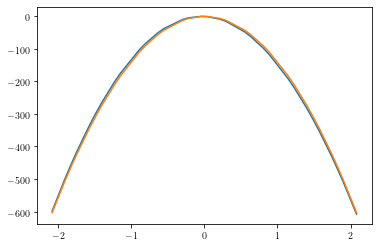

In [54]:
plt.plot(var_adiag.x, var_adiag.custom_beta)
plt.plot(var_adiag.x, a_mu*var_adiag.x**2+a_e*var_adiag.y**2+c_e)

In [55]:
dfV = pd.read_csv('../../likelihood/likelihood_V_beta.dat', sep='\t')

In [59]:
var_e_V = dfV.loc[dfV['y']==0.0424489795918368]

In [57]:
var_tau = dfV.loc[1250:1299]

[<matplotlib.lines.Line2D at 0x7f68f9f807f0>]

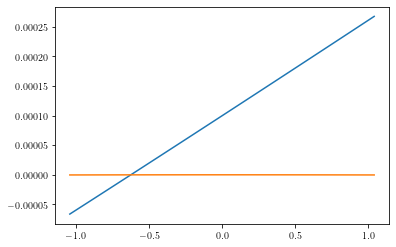

In [61]:
plt.plot(var_e_V.x, var_e_V.custom_beta)
plt.plot(var_e_V.x, a_e*var_e_V.x**2)

In [92]:
a_tau=((list(var_tau.custom_beta)[0])/list(var_tau.y)[0]**2+(list(var_tau.custom_beta)[-1])/list(var_tau.y)[-1]**2 )/2
b_tau = ((list(var_tau.custom_beta)[0])/list(var_tau.y)[0]+(list(var_tau.custom_beta)[-1])/list(var_tau.y)[-1])/2

[<matplotlib.lines.Line2D at 0x7f68fb182ca0>]

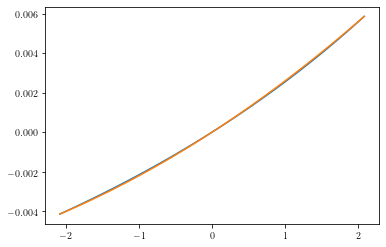

In [93]:
plt.plot(var_tau.y, var_tau.custom_beta)
plt.plot(var_tau.y, a_tau*var_tau.y**2+b_tau*var_tau.y)

In [94]:
def beta_VI(x):
    mu = x[0]
    tau = x[1]
    return a_mu * mu**2 + a_tau * tau**2 + b_tau * tau

In [99]:
xmin = -1.0
xmax = 1.0
ymin = -2.0
ymax = 2.0
xmargin = 0.02*(xmax-xmin)
ymargin = 0.02*(ymax-ymin)
GS = GridScan(beta_VI, [xmin-xmargin, ymin-ymargin], [xmax+xmargin, ymax+ymargin], 50)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    GS.run_mp(4)
GS.save_csv('../../likelihood/likelihood_VI_beta.dat')

In [100]:
def beta_XI(x):
    e = x[0]
    mu = -x[0]
    tau = x[1]
    return a_e * e**2 + a_mu * mu**2 + a_tau * tau**2 + b_tau * tau

In [101]:
xmin = -1.0
xmax = 1.0
ymin = -2.0
ymax = 2.0
xmargin = 0.02*(xmax-xmin)
ymargin = 0.02*(ymax-ymin)
GS = GridScan(beta_XI, [xmin-xmargin, ymin-ymargin], [xmax+xmargin, ymax+ymargin], 50)
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    GS.run_mp(4)
GS.save_csv('../../likelihood/likelihood_XI_beta.dat')